In [1]:
import numpy as np
import pandas as pd
import os
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time
import pygmo as pg
import math

In [2]:
dataset = pd.read_csv("Rastrigin_dataset_data.csv")
Rastrigin_dataset = dataset["val"].tolist()

In [3]:
D = 50
f_bias = -330
lower_bound = -5
upper_bound = 5

In [4]:
def func(x):
    F = 0
    for i in range(D - 1):
         z = x[i] - Rastrigin_dataset[i]
         F += z ** 2 - 10 * math.cos(2 * math.pi * z) + 10
    func = F + f_bias
    return func

In [5]:
class RAS:
    def __init__(self,xmin,xmax,D,f_bias):
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.dimension = D
        self.fitness_per_eval = []
        self.glob_opt = f_bias

    def fitness(self, x):
        #result = abs(func(x)-f_bias)
        result = func(x)
        return [result]

    def get_bounds(self):
        x_min = self.lower_bound * np.ones(self.dimension)
        x_max = self.upper_bound * np.ones(self.dimension)
        return x_min, x_max

In [16]:
def compute(func):
    global curve
    global start_time
    global end_time
    gen=2000
    start_time = time.time()
    algo = pg.algorithm(pg.de(gen=gen,F=0.6,CR=0.95,variant=3,ftol=1e-5,xtol=1e-5))
    algo.set_verbosity(100)
    popsize = 100
    prob = pg.problem(RAS(lower_bound,upper_bound,D,f_bias))
    pop = pg.population(prob, popsize)
    extract_algo = algo.extract(pg.de)
    pop = algo.evolve(pop)
    end_time = time.time()
    
    log = extract_algo.get_log()
    niter = pop.problem.get_fevals()
    
    curve = [x[2] for x in log]
    print("Best position: ", pop.champion_x)
    print("Best Fitness",pop.champion_f[0])

In [17]:
compute(func)

Best position:  [ 3.82242814  4.39811081 -3.00662908 -0.3455895   3.32690147  3.38597794
 -3.52423264  2.47478054  3.82824236  3.36137413  1.26154986  2.06060524
 -0.02023132  4.57670144  3.68850083  2.08501796  1.63036703 -3.7905409
 -3.50766747  1.01995233 -2.07422175  3.90586487 -2.68430596 -3.27915355
  3.59524677  0.6881742  -3.42810582  0.39666312  0.71275142  3.1306927
 -2.3571537   2.76638802  3.53972085 -3.7249566   1.47861414 -3.66013847
 -3.10345521  2.44012077 -0.98516635 -0.2835397  -2.67697999  3.08700651
  3.39973922  3.41143394 -3.72649566  3.83075248  1.03456619 -3.29713445
  2.75573965  1.7968574 ]
Best Fitness -223.39243768494396


In [18]:
comp_time = end_time-start_time
comp_time

19.9469997882843

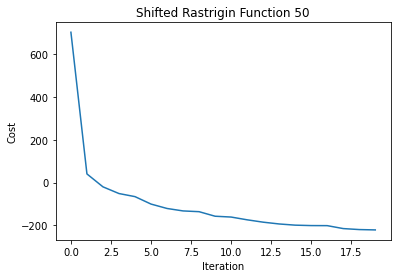

In [20]:
plt.plot(curve)
plt.title("Shifted Rastrigin Function 50")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()